In [2]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
pd.options.display.max_rows = 6

In [4]:
allyears = pd.read_csv('allyears.csv.gz')

In [5]:
allyears

,name,sex,number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
...,...,...,...,...
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


In [6]:
allyears_indexed = allyears.set_index(['sex', 'name', 'year']).sort_index()

In [7]:
allyears_indexed

number
sex name  year        
F   Aabha 2011       7
          2012       5
          2014       9
...                ...
M   Zyyon 2014       6
    Zzyzx 2010       5
          2018       5

[1957046 rows x 1 columns]

In [10]:
allyears_indexed.loc[('F', 'Mary')]

,number
year,
1880,7065
1881,6919
1882,8148
...,...
2016,2508
2017,2402
2018,2327


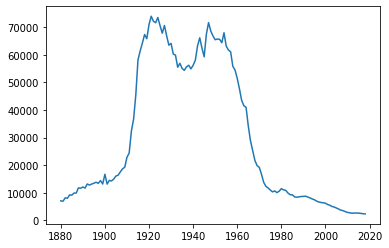

In [11]:
plt.plot(allyears_indexed.loc[('F', 'Mary')])

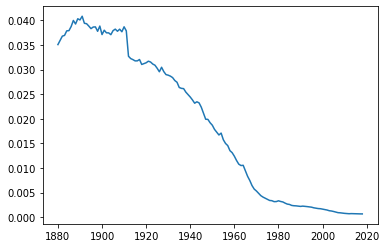

In [12]:
plt.plot(allyears_indexed.loc[('F', 'Mary')] / allyears.groupby('year').sum())

In [13]:
def plotname(sex, name):
    data = allyears_indexed.loc[(sex,name)]
    
    plt.plot(data.index, data.values, label=name)
    plt.axis(xmin=1880, xmax=2018)

In [18]:
def comparenames(sex, names):
    plt.figure(figsize=(12,2.5))
    
    for name in names:
        plotname(sex,name)
        
    plt.legend()

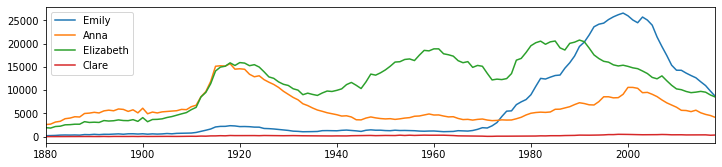

In [19]:
comparenames('F', ['Emily', 'Anna', 'Elizabeth', 'Clare'])

In [20]:
dnames = ['Emily', 'Anna', 'Elizabeth', 'Clare']

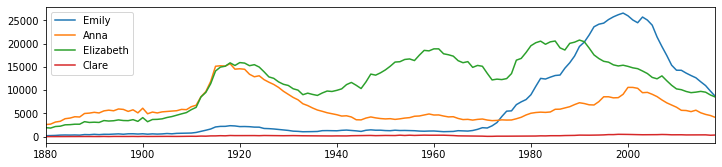

In [21]:
comparenames('F', dnames)

In [22]:
claires = ['Claire', 'Clare', 'Clara', 'Chaira', 'Ciara']

In [23]:
allyears_indexed.loc[('F', claires), :]

number
sex name  year        
F   Ciara 1972       5
          1974      16
          1975      26
...                ...
    Clare 2016     394
          2017     315
          2018     357

[463 rows x 1 columns]

In [24]:
allyears_indexed.loc[('F', claires), :].unstack(level=2)

number                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   
    Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Ciara    422.0   372.0   321.0   243.0   256.0  
    Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Clare    386.0   389.0   394.0   315.0   357.0  

[4 rows x 139 columns]

In [25]:
allyears_indexed.loc[('F', claires), :].unstack(level=1)

number                       
name      Ciara  Claire   Clara  Clare
sex year                              
F   1880    NaN    21.0  1226.0   15.0
    1881    NaN    23.0  1242.0   20.0
    1882    NaN    30.0  1490.0   21.0
...         ...     ...     ...    ...
    2016  321.0  5209.0  3072.0  394.0
    2017  243.0  4693.0  3035.0  315.0
    2018  256.0  4379.0  2877.0  357.0

[139 rows x 4 columns]

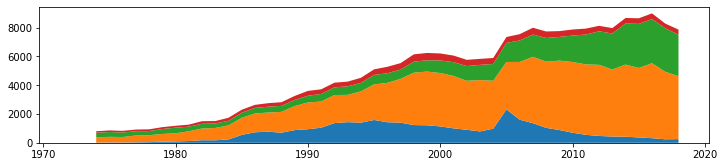

In [26]:
plt.figure(figsize=(12,2.5))
plt.stackplot(range(1880,2019),
             allyears_indexed.loc[('F', claires), :].unstack(level=2))

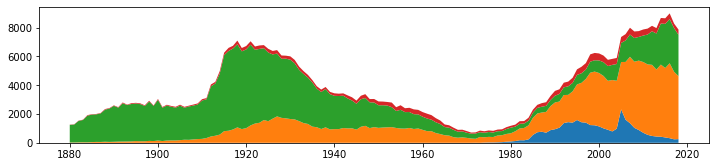

In [30]:
plt.figure(figsize=(12,2.5))
plt.stackplot(range(1880,2019),
             allyears_indexed.loc[('F', claires), :].unstack(level=2).fillna(0),
             labels=claires)